# Decision Tree Classification

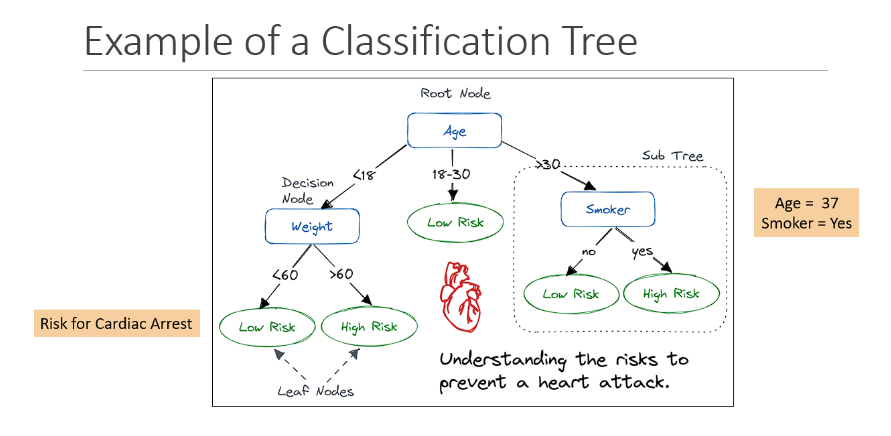

1. Root Node
2. Internal Decision Nodes
3. Leaf Node

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## Step 1: Read the Dataset

In [2]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Step 2: Perform Basic Data Quality checks

In [3]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
m = df.isna().sum()
m

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
m[m>0]

Series([], dtype: int64)

In [8]:
df.duplicated().sum()

1

## Step 3: Separate X and Y (species)

In [9]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [10]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [12]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

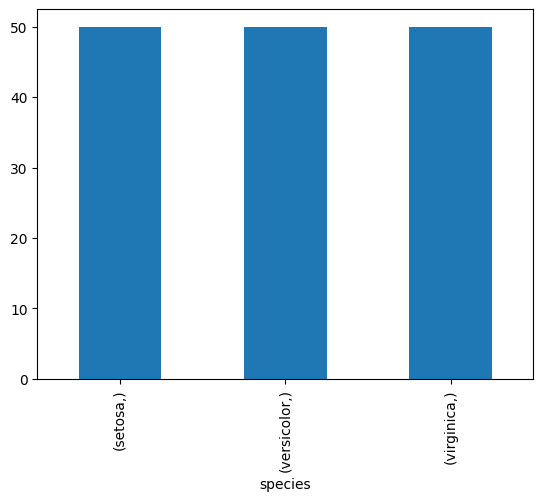

In [13]:
Y.value_counts().plot(kind='bar')

## Step 4: Apply Preprocessing on X

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# this dataset has only numerical features in X so no need for categorical pipe i.e Ordinal & OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [16]:
num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [17]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## Step 5: Aplly Train-Test Split

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=42)

In [19]:
xtrain.shape

(100, 4)

In [20]:
xtest.shape

(50, 4)

In [21]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
96,-0.173674,-0.362176,0.251221,0.132510
105,2.128516,-0.131979,1.615320,1.185567
66,-0.294842,-0.131979,0.421734,0.395774
0,-0.900681,1.019004,-1.340227,-1.315444
122,2.249683,-0.592373,1.672157,1.053935


In [22]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [23]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.310998,-0.592373,0.535409,0.000878
18,-0.173674,1.709595,-1.169714,-1.183812
118,2.249683,-1.052767,1.785832,1.448832
78,0.189830,-0.362176,0.421734,0.395774
76,1.159173,-0.592373,0.592246,0.264142


In [24]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


## Step 6: Model Builiding

In [25]:
from sklearn.tree import DecisionTreeClassifier
#give random values for the parameters, later they are going to be tuned
dtc = DecisionTreeClassifier( max_depth=1,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             criterion='gini')
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=1, min_samples_split=10)

In [26]:
dtc.score(xtrain, ytrain)

0.66

In [27]:
dtc.score(xtest, ytest)

0.68

## Step 7: Hyperparameter Tuning

In [30]:
params = {'max_depth':[1,2,3,4,5],
          'min_samples_split':[1,2,3,4,5,6,7,],
          'min_samples_leaf':[1,2,3,4,5,6,7,],
          'criterion':['gini','entropy']}

In [31]:
from sklearn.model_selection import GridSearchCV
dtc2 = DecisionTreeClassifier()
gscv = GridSearchCV(dtc2, param_grid=params, cv=5, scoring='f1_macro')
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7]},
             scoring='f1_macro')

In [32]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [34]:
gscv.best_score_
# this fives cross validation score

0.9319552669552669

In [35]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=3, min_samples_split=3)

## Step 8: Evaluate the Model

### 8(i) Check accuracy of the model (after tuning)

In [37]:
best_dtc.score(xtrain, ytrain)

0.97

In [38]:
best_dtc.score(xtest, ytest)

0.98

### 8(ii) Predict to verify with actual Train & Test

In [39]:
ypred_train = best_dtc.predict(xtrain)
ypred_test = best_dtc.predict(xtest)

In [40]:
ypred_train[0:5]

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica'],
      dtype=object)

In [41]:
ytrain.head()

,species
96,versicolor
105,virginica
66,versicolor
0,setosa
122,virginica


In [42]:
ypred_test[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [43]:
ytest.head()

,species
73,versicolor
18,setosa
118,virginica
78,versicolor
76,versicolor


### 8(iii) Plot Confusion Matrix for TEST data

In [44]:
best_dtc.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

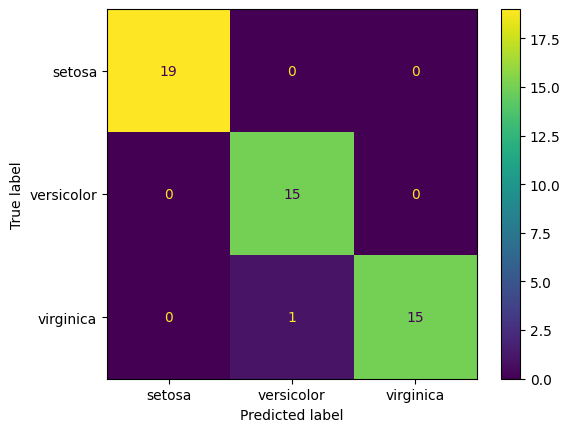

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_dtc.classes_)
cfd.plot()
# only one misclassification in resulting matrix, so it is a good model

### 8(iv) Check Classification report for TEST data

In [47]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### 8(v) Cross Validation Score

#### Note: can check for any classfication metrics

In [48]:
from sklearn.model_selection import cross_val_score
f1_scores = cross_val_score(best_dtc, xtrain, ytrain, cv=5, scoring='f1_macro')
f1_scores

array([0.95213675, 0.80952381, 0.90277778, 1.        , 0.94747475])

In [49]:
f1_scores.mean()

0.9223826173826174

### 8(vi)Check Accutacy score

In [50]:
acc_scores = cross_val_score(best_dtc, xtrain, ytrain, cv=5, scoring='accuracy')
acc_scores

array([1.  , 0.8 , 0.9 , 1.  , 0.95])

In [51]:
acc_scores.mean()

0.93

## Step 9: Plot Decision Tree

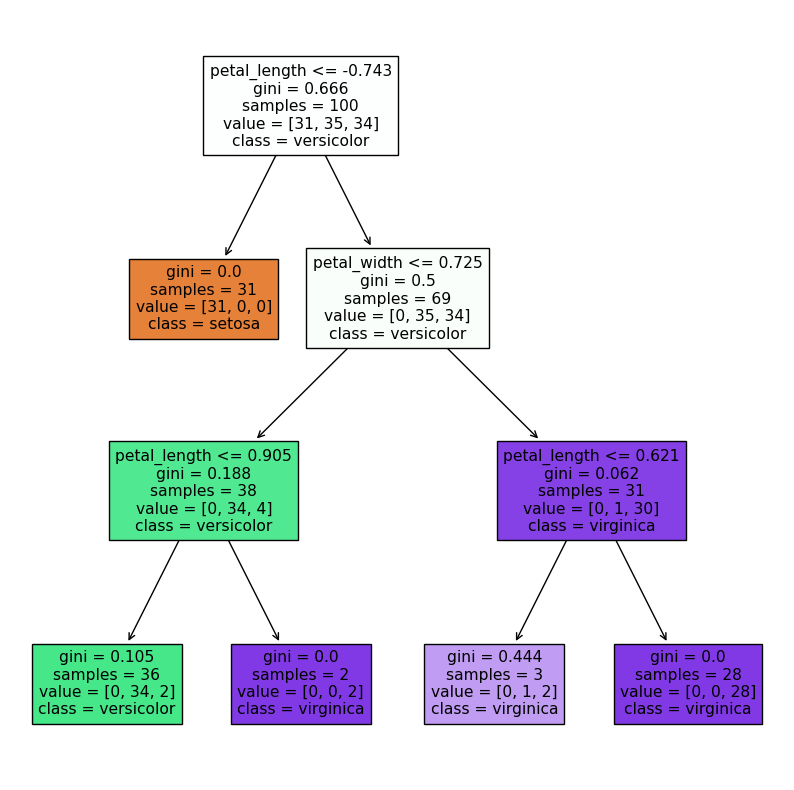

In [52]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(best_dtc,
          feature_names=xtrain.columns,
          class_names=best_dtc.classes_,
          filled=True)
plt.show()

#### 9(i) values to calculated 'gini' (best method in this case) mannually just to verify

In [53]:
best_dtc.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [54]:
ytrain.value_counts()

species   
versicolor    35
virginica     34
setosa        31
Name: count, dtype: int64

## Step 10: Out of Sample Prediction

In [55]:
xnew = pd.read_csv('iris_sample.csv')
xnew.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8


### 10(i) Apply preprocessing

In [56]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671


### 10(ii) Predict the values

In [57]:
preds = best_dtc.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

### 10(iii) Calculate Probabilty

In [58]:
probs = best_dtc.predict_proba(xnew_pre)
probs[0:5]

array([[0.        , 0.94444444, 0.05555556],
       [0.        , 0.        , 1.        ],
       [0.        , 0.94444444, 0.05555556],
       [0.        , 0.94444444, 0.05555556],
       [0.        , 0.        , 1.        ]])

### 10(iv) Get Max probability

In [59]:
import numpy as np
max_probs = np.max(probs, axis=1)
max_probs

array([0.94444444, 1.        , 0.94444444, 0.94444444, 1.        ,
       1.        , 0.94444444, 1.        , 1.        , 1.        ,
       0.94444444, 0.94444444, 1.        , 0.94444444, 0.94444444])

## Step 11: Save above to the DF (xnew)

In [60]:
xnew['species_pred'] = preds
xnew['prob'] = max_probs

In [61]:
xnew.head()

,sepal_length,sepal_width,petal_length,petal_width,species_pred,prob
0,5.5,2.5,4.0,1.3,versicolor,0.944444
1,6.9,3.1,5.1,2.3,virginica,1.000000
2,5.1,2.5,3.0,1.1,versicolor,0.944444
3,4.4,2.9,NaN,0.2,versicolor,0.944444
4,5.9,3.0,5.1,1.8,virginica,1.000000


## Step 12: Save the Df to csv

In [62]:
xnew.to_csv('DTCResults.csv', index=False)

## Step 13: Push the file to github
1. git add .
2. git commit -m "Class 19 - 09.03 - Decision Tree Classification"
3. git push -u origin main